# 卷积神经网络-CNN
卷积神经网络（convolutional neural network）是含有卷积层（convolutional layer）的神经网络。本章中介绍的卷积神经网络均使用最常见的二维卷积层。它有高和宽两个空间维度，常用来处理图像数据。

## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 超参

In [2]:
EPOCHS = 50
BATCH_SIZE = 256
VERBOSE = 1
VALIDATION_SPLIT = 0.3

## 导入数据集

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = tf.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2], -1))
test_images = tf.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2], -1))

In [6]:
train_images.shape

TensorShape([60000, 28, 28, 1])

## 定义模型

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


## 设置优化器和损失函数

In [9]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

## 开始训练

In [10]:
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 45us/sample - loss: 2.7669 - accuracy: 0.4316
Epoch 2/50
60000/60000 [==============================] - 1s 19us/sample - loss: 1.3171 - accuracy: 0.5140
Epoch 3/50
60000/60000 [==============================] - 1s 18us/sample - loss: 0.9867 - accuracy: 0.6470
Epoch 4/50
60000/60000 [==============================] - 1s 18us/sample - loss: 0.7233 - accuracy: 0.7614
Epoch 5/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4892 - accuracy: 0.8539
Epoch 6/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3417 - accuracy: 0.8840
Epoch 7/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2970 - accuracy: 0.8967
Epoch 8/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2803 - accuracy: 0.9003
Epoch 9/50
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2596 - accuracy: 0.9071
Epoch 10/50
60

## 绘制梯度下降图

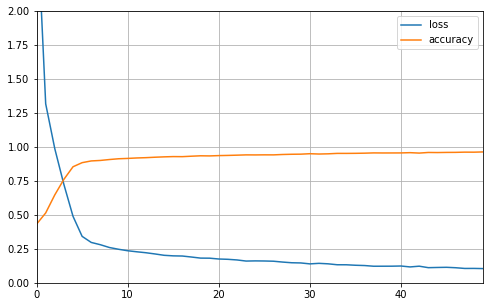

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
    
plot_learning_curves(history)

## 测试训练好的模型

In [14]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.5953 - accuracy: 0.8857


[0.5952885025709868, 0.88570005]

## 保存模型 

In [15]:
model.save('./save/save_model/model.h5')

In [16]:
model.save_weights('./save/save_weights/model_weights.h5')